In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import string
import nltk
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from nltk import WordNetLemmatizer

In [3]:
train_df = pd.read_csv("train.csv", encoding="latin1")
test_df = pd.read_csv("test.csv", encoding="latin1")

In [4]:
train_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [5]:
train_df.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [6]:
train_df.shape

(99989, 3)

### Data Cleaning

In [7]:
train_df.SentimentText = train_df.SentimentText.str.lower()

In [8]:
train_df.SentimentText = train_df.SentimentText.str.replace("@[\w]*", " ", regex=True)

In [9]:
train_df.SentimentText = train_df.SentimentText.str.replace("&lt|&gt", " ", regex=True)

In [10]:
def remove_punctuation(text):
    
    translator = str.maketrans('', '', string.punctuation)
    
    return text.translate(translator)

In [11]:
train_df.SentimentText = train_df.SentimentText.str.replace("[^A-Za-z#]", " ", regex=True)

In [12]:
train_df.SentimentText = train_df.SentimentText.str.replace("[\s]+", " ", regex=True).str.lstrip().str.rstrip()

In [13]:
train_df.head(20)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl friend
1,2,0,i missed the new moon trailer
2,3,1,omg its already o
3,4,0,omgaga im sooo im gunna cry i ve been at this ...
4,5,0,i think mi bf is cheating on me t t
5,6,0,or i just worry too much
6,7,1,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,sunny again work tomorrow tv tonight
8,9,1,handed in my uniform today i miss you already
9,10,1,hmmmm i wonder how she my number


In [40]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):    
    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [41]:
train_df.SentimentText = train_df.SentimentText.apply(lemmatizing)

In [42]:
train_df.SentimentText.head(15)

0                           is so sad for my apl friend
1                           i miss the new moon trailer
2                                      omg it alreadi o
3     omgaga im sooo im gunna cri i ve been at this ...
4                      i think mi bf is cheat on me t t
5                              or i just worri too much
6                      juuuuuuuuuuuuuuuuussssst chillin
7                  sunni again work tomorrow tv tonight
8           hand in my uniform today i miss you alreadi
9                      hmmmm i wonder how she my number
10                             i must think about posit
11         thank to all the hater up in my face all day
12                          this weekend ha suck so far
13                   jb isnt show in australia ani more
14                                   ok that it you win
Name: SentimentText, dtype: object

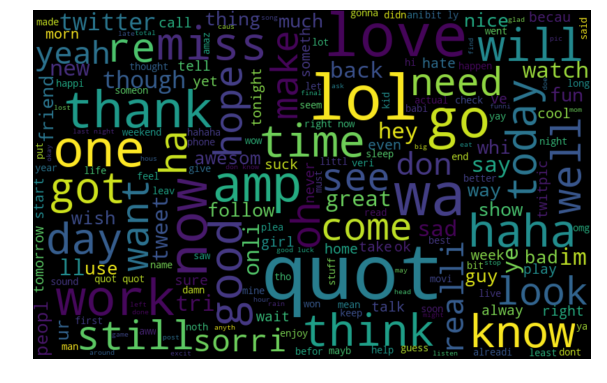

In [43]:
all_words = ' '.join([text for text in train_df.SentimentText])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

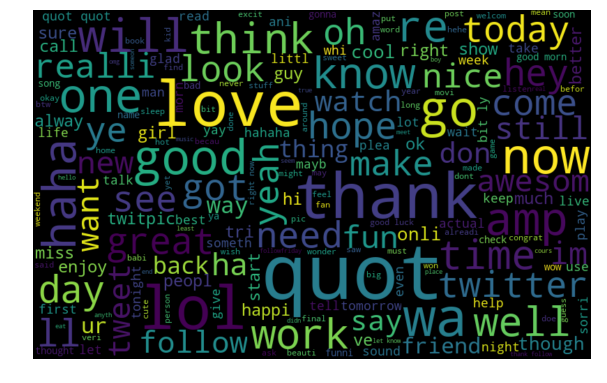

In [44]:
normal_words =' '.join([text for text in train_df.loc[ train_df.Sentiment == 1, "SentimentText" ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

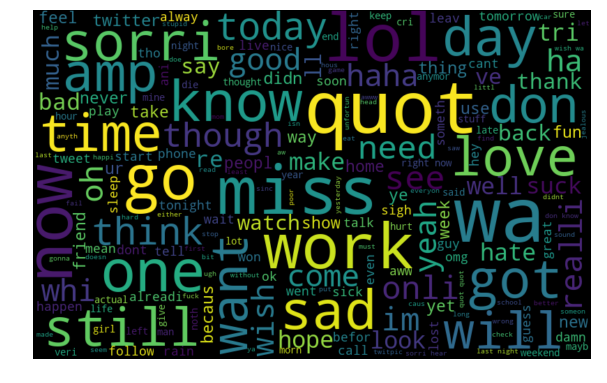

In [45]:
negative_words = ' '.join([text for text in train_df.loc[ train_df.Sentiment == 0, "SentimentText" ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Features using BOW

In [46]:
bow_vectorizer = CountVectorizer(max_df=0.90, stop_words='english')

bow = bow_vectorizer.fit_transform(train_df.SentimentText)

In [47]:
bow.shape

(99989, 41363)

### Features using Tf-Idf

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, ngram_range=(1, 1), stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(train_df.SentimentText)

In [49]:
tfidf.shape

(99989, 41363)

In [50]:
scaler = MaxAbsScaler()

tfidf_scaled = scaler.fit_transform(tfidf)

### Modeling using BOW features

In [51]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, train_df.Sentiment, random_state=42, test_size=0.3)

lreg_bow = LogisticRegression()
lreg_bow.fit(xtrain_bow, ytrain) # training the model

prediction = lreg_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7077041037437077

In [52]:
lsvc_bow = LinearSVC(max_iter=3000)
lsvc_bow.fit(xtrain_bow, ytrain) # training the model

prediction = lsvc_bow.predict(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7077041037437077

### Modeling using Tf-Idf features

In [36]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_scaled, train_df.Sentiment, random_state=42, test_size=0.3)

lreg_tfidf = LogisticRegression()
lreg_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7007700770077008